# Flight Fare Prediction – Exploratory Data Analysis (EDA)
---
## Description
This project performs **Exploratory Data Analysis (EDA)** on an airline ticket pricing dataset to understand patterns, trends, and factors affecting ticket fares.  
The insights from this analysis will be used for predictive modeling to forecast airline ticket prices accurately.
## 1. Introduction
In the airline industry, ticket prices are highly dynamic and influenced by multiple factors such as travel season, departure schedules, route, seat availability, and operational costs. Accurately predicting fares helps airlines optimize revenue and allows customers to make informed travel decisions.

To better understand the dataset and uncover patterns, we perform **Exploratory Data Analysis (EDA)**.

### 1.1 What is EDA?
**Exploratory Data Analysis (EDA)** is the process of analyzing datasets to summarize their main characteristics, often using **visualization and statistical techniques**. It helps in:
- Identifying trends, patterns, and anomalies in data  
- Detecting missing values and outliers  
- Understanding relationships between features  
- Preparing data for modeling  

### 1.2 Why EDA is important in this scenario
For airline fare prediction:
- **Price patterns across airlines, routes, and seasons** can be discovered  
- **Impact of factors like stops, duration, and departure time** on ticket fares can be analyzed  
- **Outliers and inconsistent data** can be detected and handled  
- **Feature engineering decisions** (like creating Flight_Dept_Slot or Price_Category) are guided by insights from EDA  

This analysis will help build **accurate machine learning models** for forecasting airline ticket prices effectively.

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sn

In [4]:
df = pd.read_excel("Data_Train.xlsx") 
df.head() # Show first 5 rows

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## 2. Data Dictionary: Airline Fare Dataset

| Column Name       | Data Type | Description                                                                 |
|------------------|-----------|-----------------------------------------------------------------------------|
| Airline           | Object    | Name of the airline operating the flight (e.g., IndiGo, Air India, Jet Airways). |
| Date_of_Journey   | Date      | The date on which the flight is scheduled to depart (DD/MM/YYYY format).    |
| Source            | Object    | Departure city of the flight.                                               |
| Destination       | Object    | Arrival city of the flight.                                                 |
| Route             | Object    | Flight path including intermediate stops (e.g., DEL → LKO → BOM → COK).    |
| Dep_Time          | Time      | Scheduled departure time of the flight (HH:MM format).                      |
| Arrival_Time      | Time      | Scheduled arrival time of the flight. Includes day if next day (HH:MM DD MMM). |
| Duration          | String    | Total flight duration (hours and minutes, e.g., 2h 50m).                   |
| Total_Stops       | Object    | Number of stops during the flight (e.g., non-stop, 1 stop, 2 stops).       |
| Additional_Info   | Object    | Extra information about the flight (e.g., “No info”, “Red-eye”, “In-flight meal”). |
| Price             | Numeric   | Ticket price of the flight in INR.                                          |

In [5]:
df.shape

(10683, 11)

In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10683 non-null  str  
 1   Date_of_Journey  10683 non-null  str  
 2   Source           10683 non-null  str  
 3   Destination      10683 non-null  str  
 4   Route            10682 non-null  str  
 5   Dep_Time         10683 non-null  str  
 6   Arrival_Time     10683 non-null  str  
 7   Duration         10683 non-null  str  
 8   Total_Stops      10682 non-null  str  
 9   Additional_Info  10683 non-null  str  
 10  Price            10683 non-null  int64
dtypes: int64(1), str(10)
memory usage: 918.2 KB


### 3.Preprocessing 
### 3.1 Converting Date_of_Journey to Datetime Format 
To perform date-based analysis, it is important that the Date_of_Journey column is in **datetime format**. This allows us to extract useful features such as **day of the week, month, weekend/weekday**, and **season**.

In [7]:
df["Date_of_Journey"]=pd.to_datetime(df["Date_of_Journey"])

C:\Users\s sai lohitha\AppData\Local\Temp\ipykernel_17704\1095084678.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date_of_Journey"]=pd.to_datetime(df["Date_of_Journey"])


### 3.2 Previewing the Dataset 
To get an overview of the dataset and understand its structure, we can use:

In [8]:
df["Route"].isna().sum()

np.int64(1)

In [9]:
# Drop rows where Route is NaN 
df = df.dropna(subset=['Route']) 
# Verify 
print(df['Route'].isna().sum()) # Should be 0 
print(df.shape) # Check if row count decreased by 1

0
(10682, 11)


In [10]:
# Check duplicate rows (all columns) 
duplicate_rows = df[df.duplicated()] 
print("Number of duplicate rows:", duplicate_rows.shape[0])

Number of duplicate rows: 220


In [11]:
# View duplicates 
print(duplicate_rows)

           Airline Date_of_Journey    Source Destination  \
683    Jet Airways      2019-06-01     Delhi      Cochin   
1061     Air India      2019-05-21     Delhi      Cochin   
1348     Air India      2019-05-18     Delhi      Cochin   
1418   Jet Airways      2019-06-06     Delhi      Cochin   
1674        IndiGo      2019-03-24  Banglore   New Delhi   
...            ...             ...       ...         ...   
10594  Jet Airways      2019-06-27     Delhi      Cochin   
10616  Jet Airways      2019-06-01     Delhi      Cochin   
10634  Jet Airways      2019-06-06     Delhi      Cochin   
10672  Jet Airways      2019-06-27     Delhi      Cochin   
10673  Jet Airways      2019-05-27     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
683    DEL → NAG → BOM → COK    14:35  04:25 02 Jun  13h 50m     2 stops   
1061   DEL → GOI → BOM → COK    22:00  19:15 22 May  21h 15m     2 stops   
1348   DEL → HYD → BOM → COK    17:15  19:15 19 May

In [12]:
# Remove duplicate rows 
df = df.drop_duplicates()

In [13]:
# Verify 
print("Shape after removing duplicates:", df.shape)

Shape after removing duplicates: (10462, 11)


### 3.3 Cleaning Arrival_Time Column 
The Arrival_Time column sometimes contains extra information such as dates or spaces. We extract only the **time part (HH:MM)** for easier analysis:

In [14]:
df["Arrival_Time"]=df["Arrival_Time"].astype(str).str.split().str[0] 
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### 4.Feature Engineering
### 4.1 Creating Num_of_Routes_Covered Column

To analyze the complexity of a flight route, we calculate the **number of routes covered**:

In [15]:
df['Num_of_Routes_Covered'] = df['Route'].str.split('→').str.len()-1 
df.info()

<class 'pandas.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Airline                10462 non-null  str           
 1   Date_of_Journey        10462 non-null  datetime64[us]
 2   Source                 10462 non-null  str           
 3   Destination            10462 non-null  str           
 4   Route                  10462 non-null  str           
 5   Dep_Time               10462 non-null  str           
 6   Arrival_Time           10462 non-null  object        
 7   Duration               10462 non-null  str           
 8   Total_Stops            10462 non-null  str           
 9   Additional_Info        10462 non-null  str           
 10  Price                  10462 non-null  int64         
 11  Num_of_Routes_Covered  10462 non-null  int64         
dtypes: datetime64[us](1), int64(2), object(1), str(8)
memory usage: 1.0+ MB


In [16]:
df['Num_of_Routes_Covered'] = df['Num_of_Routes_Covered'].fillna(0).astype(int)

In [17]:
df.info()

<class 'pandas.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Airline                10462 non-null  str           
 1   Date_of_Journey        10462 non-null  datetime64[us]
 2   Source                 10462 non-null  str           
 3   Destination            10462 non-null  str           
 4   Route                  10462 non-null  str           
 5   Dep_Time               10462 non-null  str           
 6   Arrival_Time           10462 non-null  object        
 7   Duration               10462 non-null  str           
 8   Total_Stops            10462 non-null  str           
 9   Additional_Info        10462 non-null  str           
 10  Price                  10462 non-null  int64         
 11  Num_of_Routes_Covered  10462 non-null  int64         
dtypes: datetime64[us](1), int64(2), object(1), str(8)
memory usage: 1.0+ MB


In [18]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Num_of_Routes_Covered
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,1
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,3
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,3
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2


## 4.2 Extracting Month from Date_of_Journey 
To analyze seasonal patterns in ticket prices, we extract the **month** from the Date_of_Journey column:

In [19]:
df["Month"]=pd.to_datetime(df["Date_of_Journey"]).dt.month 
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Num_of_Routes_Covered,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,1,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,3,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,3,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2,3


### 4.3 Converting Duration to Total Minutes (Duration_min) 
To perform numerical analysis on flight durations, we convert the Duration column (format like "2h 50m") into **total minutes**:

In [20]:
df["Duration_min"] = df["Duration"].apply( lambda x: 
                                           (int(x.split("h")[0]) * 60 if "h" in x else 0) + 
                                           (int(x.split("h")[1].replace("m", "").strip()) 
                                            if ("h" in x and "m" in x) else 
                                            int(x.replace("m", "").strip()) if "m" in x else 0) )

### 4.4 Calculating Total_Stops 
The Total_Stops column represents the **number of stops between the source and destination**. We can derive it from the previously created Num_of_Routes_Covered column:

In [21]:
df["Total_Stops"]=df["Num_of_Routes_Covered"]-1 
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Num_of_Routes_Covered,Month,Duration_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,No info,3897,1,3,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,3,5,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,No info,13882,3,6,1140
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,2,5,325
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,2,3,285


In [22]:
df["Airline"].unique()

<StringArray>
[                           'IndiGo',                         'Air India',
                       'Jet Airways',                          'SpiceJet',
                 'Multiple carriers',                             'GoAir',
                           'Vistara',                          'Air Asia',
           'Vistara Premium economy',              'Jet Airways Business',
 'Multiple carriers Premium economy',                            'Trujet']
Length: 12, dtype: str

In [23]:
df["Additional_Info"].unique()

<StringArray>
[                     'No info',  'In-flight meal not included',
 'No check-in baggage included',              '1 Short layover',
                      'No Info',               '1 Long layover',
              'Change airports',               'Business class',
               'Red-eye flight',               '2 Long layover']
Length: 10, dtype: str

### 4.5 Creating Season Column 
To analyze seasonal trends in ticket prices, we map each **month** to the corresponding **season** in Indian climate:

In [24]:
def month_to_season(month): 
    if month in [12, 1, 2]: 
        return 'Winter' 
    elif month in [3, 4, 5]: 
        return 'Summer' 
    elif month in [6, 7, 8, 9]: 
        return 'Monsoon' 
    elif month in [10, 11]:
        return 'Autumn' 
# Apply function 
df['Season'] = df['Month'].apply(month_to_season)

In [25]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Num_of_Routes_Covered,Month,Duration_min,Season
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,No info,3897,1,3,170,Summer
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,3,5,445,Summer
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,No info,13882,3,6,1140,Monsoon
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,2,5,325,Summer
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,2,3,285,Summer


### 4.6 Extracting Key Information from Additional_Info 
Some values in the Additional_Info column provide useful information about flights, such as **long layovers, airport changes, or business class**. We create **binary columns** for these categories:

In [26]:
# List of categories you want as separate columns 
info_cols = [ '1 Long layover', 'Change airports', 'Business class', ] 
# Create binary columns 
for col in info_cols: 
    df[col.replace(' ', '_')] = df['Additional_Info'].apply( lambda x: 1 if col.lower() in str(x).lower() else 0 )

In [27]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'], format='%H:%M')

### 4.7 Creating Flight_Dept_Slot Column 
To analyze ticket prices based on **time of day**, we categorize flight departure times into **slots**:

In [28]:
def time_of_day(time): 
    Hour = time.hour 
    if 5 <= Hour < 12: 
        return 'Mrng' 
    elif 12 <= Hour < 17: 
        return 'Aft' 
    elif 17 <= Hour < 21: 
        return 'Evng' 
    else: 
        return 'Nyt' 
df['Flight_Dept_Slot'] = df['Dep_Time'].apply(time_of_day)

### 4.8 Creating Weekend Indicator column 
To analyze travel patterns based on the day of travel, the Date_of_Journey column is converted into a datetime format. From this, the **day of the week** is extracted and a **binary weekend indicator** is created.

In [29]:
df["Day_of_Dept"]=pd.to_datetime(df["Date_of_Journey"]).dt.day_name() 
df["Is_Weekend"]=df["Day_of_Dept"].isin(["Saturday","Sunday"]).astype(int)

### 4.8.1 No of Weekend Flights

In [30]:
print(df["Is_Weekend"].isin([1]).sum())

3072


### 4.8.2 No of Weekday Flights

In [31]:
print(df["Is_Weekend"].isin([0]).sum())

7390


In [32]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Num_of_Routes_Covered,Month,Duration_min,Season,1_Long_layover,Change_airports,Business_class,Flight_Dept_Slot,Day_of_Dept,Is_Weekend
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,1900-01-01 22:20:00,01:10,2h 50m,0,No info,...,1,3,170,Summer,0,0,0,Nyt,Sunday,1
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,1900-01-01 05:50:00,13:15,7h 25m,2,No info,...,3,5,445,Summer,0,0,0,Mrng,Wednesday,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1900-01-01 09:25:00,04:25,19h,2,No info,...,3,6,1140,Monsoon,0,0,0,Mrng,Sunday,1
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,1900-01-01 18:05:00,23:30,5h 25m,1,No info,...,2,5,325,Summer,0,0,0,Evng,Sunday,1
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,1900-01-01 16:50:00,21:35,4h 45m,1,No info,...,2,3,285,Summer,0,0,0,Aft,Friday,0


### 5.Descriptive Statistics: 
Mean, Median, and Mode of Price To understand the **central tendency** of ticket prices, we calculate:

In [35]:
import pandas as pd 
from scipy import stats 
# 1. Mean 
mean_price = df['Price'].mean() 
print("Mean Price:", mean_price) 
# 2. Median 
median_price = df['Price'].median() 
print("Median Price:", median_price) 
# 3. Mode 
mode_price = df['Price'].mode() 
# Returns a Series (can have multiple modes) 
print("Mode Price(s):", mode_price.values)

Mean Price: 9026.790288663735
Median Price: 8266.0
Mode Price(s): [10262]


### 5.1 Checking Skewness of Price

Skewness measures the **asymmetry** of the distribution of a dataset.  
We calculate it for the Price column to understand if prices are **symmetrically distributed** or **skewed**:

In [36]:
skew_value = df['Price'].skew() 
print("Skewness:", skew_value) 
if skew_value > 0: 
    print("Right-skewed (positively skewed)") 
elif skew_value < 0: 
    print("Left-skewed (negatively skewed)") 
else: 
    print("Symmetric distribution")

Skewness: 1.8574899082173866
Right-skewed (positively skewed)


### 5.2 Understanding Right Skew (Positive Skew) 
A **right-skewed (positively skewed) distribution** means: 
- Most of the data values are **clustered on the left** (lower values). 
- There is a **long tail stretching to the right**, representing **a few very high values**. 
- In the context of ticket prices: 
- Most tickets are **affordable or moderate in price**. 
- A few tickets have **extremely high fares**, pulling the mean to the right. **Visual cue:** 
- Mean > Median - Histogram has a **long tail on the right side**. 
--- 
### 5.3 Price Distribution with Mean and Median 
We visualize the **distribution of ticket prices** using a histogram and overlay the **mean and median**:

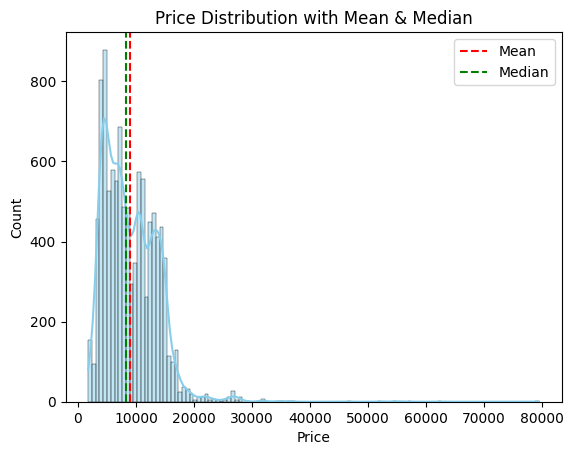

In [37]:
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.histplot(df['Price'], kde=True, color='skyblue') 
plt.axvline(df['Price'].mean(), color='red', linestyle='--', label='Mean') 
plt.axvline(df['Price'].median(), color='green', linestyle='--', label='Median') 
plt.title('Price Distribution with Mean & Median') 
plt.legend() 
plt.show()

### 6.Boxplot 
A **boxplot** (or whisker plot) is a powerful tool in Exploratory Data Analysis (EDA) because it **summarizes the distribution of a dataset** in a compact form: 
**Key purposes:
** 1. **Visualize central tendency and spread** 
- The box shows the **interquartile range (IQR)** (25th–75th percentile). 
- The line inside the box represents the **median**. 
2. **Detect outliers** 
- Points outside the whiskers (1.5×IQR from the quartiles) are considered **outliers**. 
- Helps decide whether to **cap, remove, or transform extreme values**. 
3. **Compare distributions** (if grouped by categories) 
- Boxplots allow easy comparison of distributions across groups (e.g., prices per airline or season). 
4. **Understand skewness visually** 
- If the median line is closer to the bottom or top of the box, it indicates **skewed data**. 
**In this scenario:** 
- We use a boxplot for Price to **detect extreme fares** and understand the **spread and central tendency** of ticket prices, which is critical before modeling.

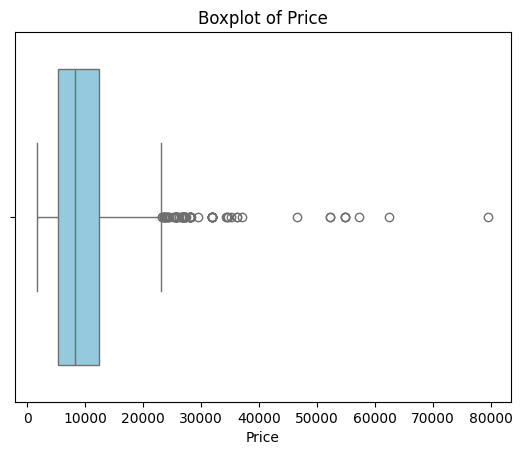

In [38]:
import seaborn as sns 
import matplotlib.pyplot as plt 
# Boxplot for Price plt.figure(figsize=(8,5)) 
sns.boxplot(x=df['Price'], color='skyblue') 
plt.title('Boxplot of Price') 
plt.xlabel('Price') 
plt.show()

### 6.1 Handling Outliers in Price Using IQR Capping 
To reduce the effect of **extreme ticket prices** on analysis and modeling, we remove outliers using the **Interquartile Range (IQR) method**:

In [39]:
import pandas as pd 
# Calculate Q1, Q3, and IQR 
Q1 = df['Price'].quantile(0.25) 
Q3 = df['Price'].quantile(0.75) 
IQR = Q3 - Q1 
# Define bounds 
lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR 
# Keep only rows within bounds 
df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)] 
df_original = df.copy() 
# Check the shape 
print("Original shape:", df.shape)

Original shape: (10368, 21)


### 6.2 Capping Extreme Price Values 
### Capping 
**Capping** (also called **winsorization**) is used to **limit the effect of extreme values (outliers)** without removing rows from the dataset. 
**Key reasons for using capping:** 
1. **Reduce influence of outliers** 
- Extreme ticket prices can skew statistics like mean and standard deviation. 
- Capping keeps the data within reasonable bounds. 
2. **Preserve data size** 
- Unlike removing outliers, capping **does not drop rows**, so we retain all observations. 
3. **Improve model performance** 
- Many machine learning algorithms are sensitive to outliers. 
- Capping ensures models learn from the **typical range of values**. 
4. **Maintain visual clarity** 
- Boxplots, histograms, and other charts look cleaner and **better reflect the main distribution** after capping. **In this scenario:** 
- We cap Price at the **1st and 99th percentile** to limit extremely low or high fares while keeping most data intact.

In [40]:
lower_cap = df['Price'].quantile(0.01) 
upper_cap = df['Price'].quantile(0.99) 
print(lower_cap, upper_cap) 
df['Price_capped'] = df['Price'].clip(lower=lower_cap, upper=upper_cap)

2227.0 18766.85


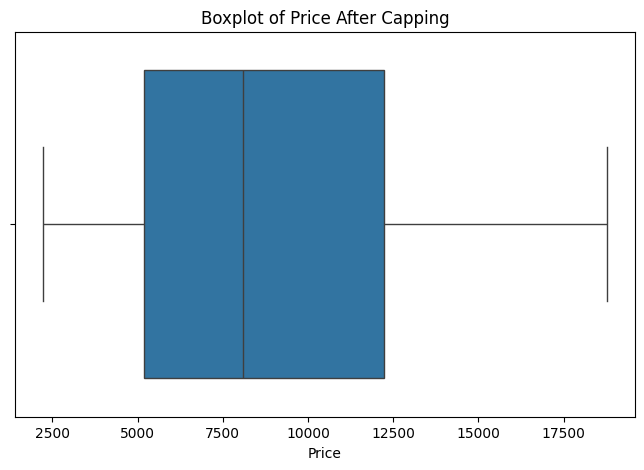

In [41]:
plt.figure(figsize=(8,5)) 
sns.boxplot(x=df['Price_capped']) 
plt.title('Boxplot of Price After Capping') 
plt.xlabel('Price') 
plt.show()

### 6.3 Airline vs Ticket Price Distribution (with Capping) 
We analyze ticket price distribution across airlines and demonstrate outlier treatment using percentile capping:

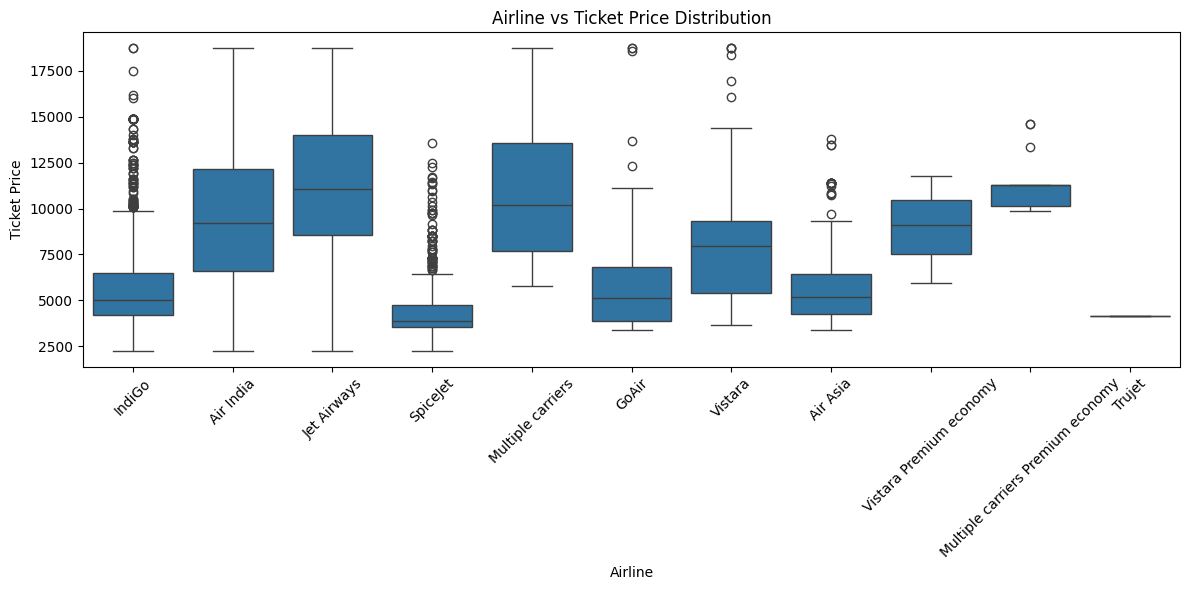

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(x='Airline',y='Price_capped',data=df)

plt.title('Airline vs Ticket Price Distribution')
plt.xlabel('Airline')
plt.ylabel('Ticket Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [54]:
#Capping
lower=df['Price'].quantile(0.01)
upper=df['Price'].quantile(0.99)

df['Price_capped']=df['Price'].clip(lower,upper)

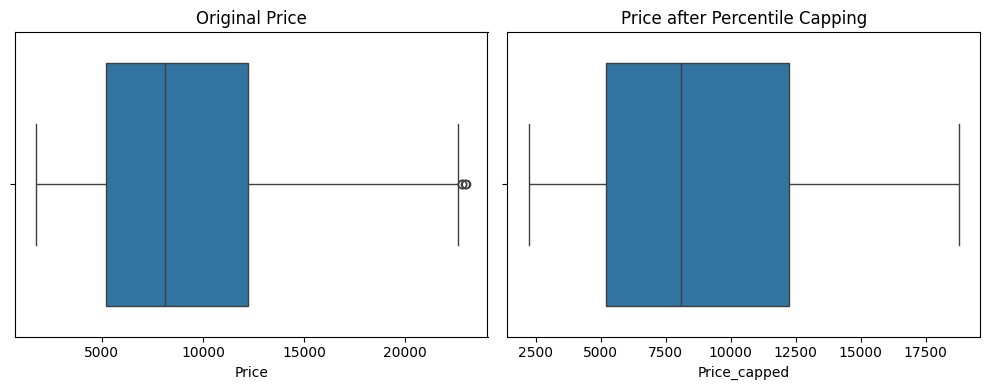

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.boxplot(x=df['Price'])
plt.title('Original Price')

plt.subplot(1,2,2)
sns.boxplot(x=df['Price_capped'])
plt.title('Price after Percentile Capping')

plt.tight_layout()
plt.show()

### 7.Plots 
### 7.1 Average Airline Fare by Season 
We analyze how **average ticket prices vary across different seasons** using a **bar plot**:

Season
Monsoon    8736.152522
Summer     8878.151197
Name: Price, dtype: float64


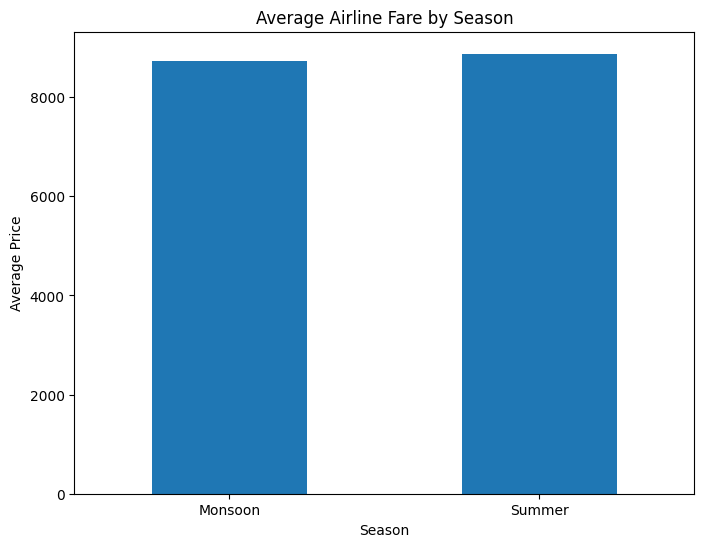

In [56]:
season_price = df.groupby('Season')['Price'].mean() 
print(season_price) 
import matplotlib.pyplot as plt 
plt.figure(figsize=(8,6)) 
season_price.plot(kind='bar') 
plt.xlabel('Season') 
plt.ylabel('Average Price') 
plt.title('Average Airline Fare by Season') 
plt.xticks(rotation=0) 
plt.show()

**Insight:** Summer fares are slightly higher than Monsoon fares, reflecting peak-season demand and seasonal pricing behavior.

### 7.2 Average Flight Price by Month 
We analyze how **average ticket prices vary across different months** using a **bar plot**:

Month
3    9987.149323
4    5766.545455
5    9021.802004
6    8736.152522
Name: Price, dtype: float64


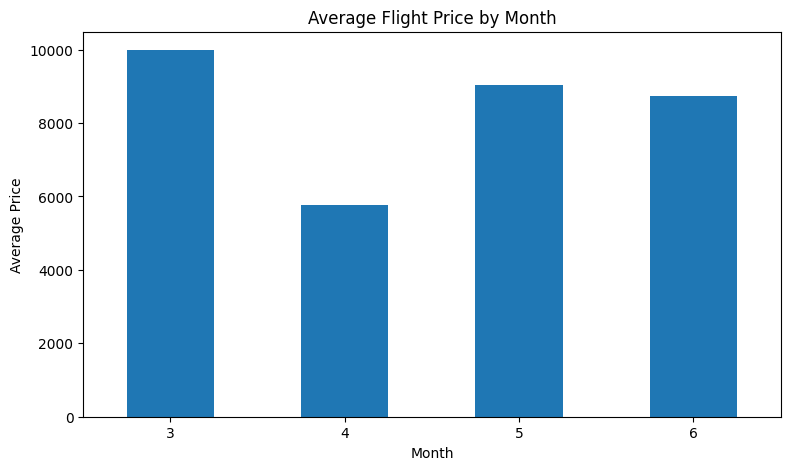

In [57]:
import matplotlib.pyplot as plt 
month_price = df.groupby('Month')['Price'].mean() 
print(month_price) 
plt.figure(figsize=(9,5)) 
month_price.plot(kind='bar') 
plt.title('Average Flight Price by Month') 
plt.xlabel('Month') 
plt.ylabel('Average Price') 
plt.xticks(rotation=0) 
plt.show()

**Insight:** Flight prices peak in March, drop sharply in April, and rise again in May–June, indicating strong seasonal demand fluctuations with March being the highest-demand month**

### 7.3 Average Flight Price by Departure Slot 
We analyze how **average ticket prices vary across different departure time slots** using a **bar plot**:

Flight_Dept_Slot
Aft     9156.503229
Evng    9005.139887
Mrng    8940.965336
Nyt     7782.004164
Name: Price, dtype: float64


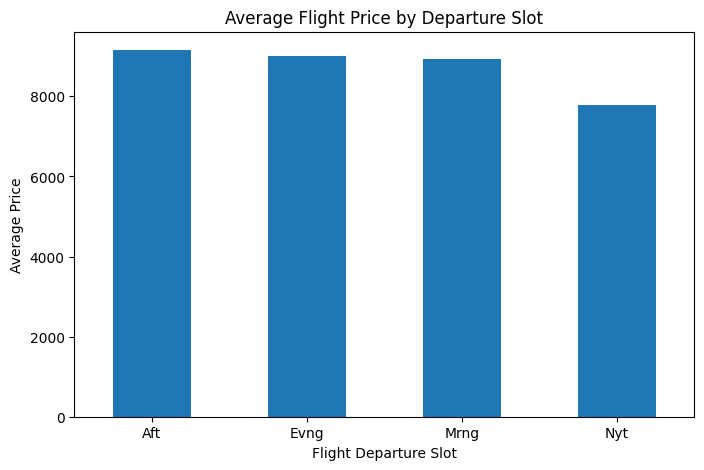

In [58]:
slot_price = df.groupby('Flight_Dept_Slot')['Price'].mean() 
print(slot_price) 
plt.figure(figsize=(8,5)) 
slot_price.plot(kind='bar') 
plt.title('Average Flight Price by Departure Slot') 
plt.xlabel('Flight Departure Slot') 
plt.ylabel('Average Price') 
plt.xticks(rotation=0) 
plt.show()

**Insight:** Afternoon flights have the highest average fares, while Night flights are the cheapest, indicating that passengers pay a premium for more convenient departure times.

### 7.4 Average Flight Price vs Number of Routes Covered 
We analyze how **average ticket prices vary with the number of routes a flight covers** using a **line plot**:

Num_of_Routes_Covered
1     4998.775922
2    10322.241081
3    12554.862519
4    13260.674419
5    17686.000000
Name: Price, dtype: float64


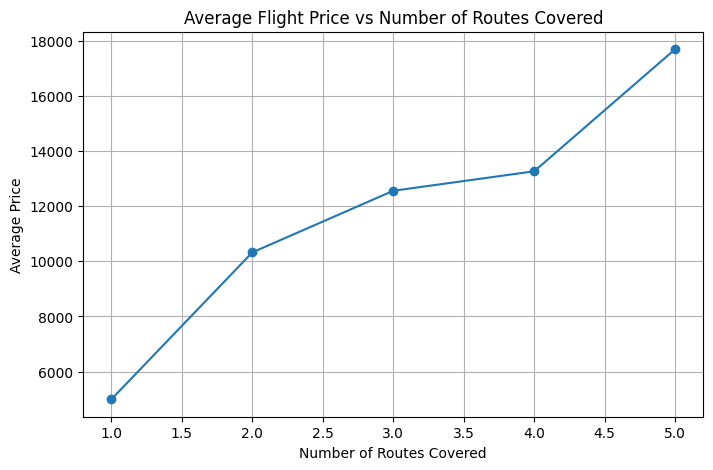

In [59]:
route_price = ( df.groupby('Num_of_Routes_Covered')['Price'] .mean() .sort_index() ) 
print(route_price) 
plt.figure(figsize=(8,5)) 
plt.plot(route_price.index, route_price.values, marker='o') 
plt.title('Average Flight Price vs Number of Routes Covered') 
plt.xlabel('Number of Routes Covered') 
plt.ylabel('Average Price') 
plt.grid(True) 
plt.show()

**Insight:** Average ticket price increases sharply as the number of routes covered rises, showing that flights with more connections and complex routing are significantly more expensive.

### 7.5 Average Flight Price vs Flight Duration 
We analyze how **average ticket prices vary with flight duration** using a **scatter plot**:

Duration_min
5       17327.000000
75       3944.333333
80       3286.377049
85       5011.162963
90       3721.484456
            ...     
2480    13990.000000
2525    11664.000000
2565    12819.000000
2820    20064.000000
2860    20694.000000
Name: Price, Length: 368, dtype: float64


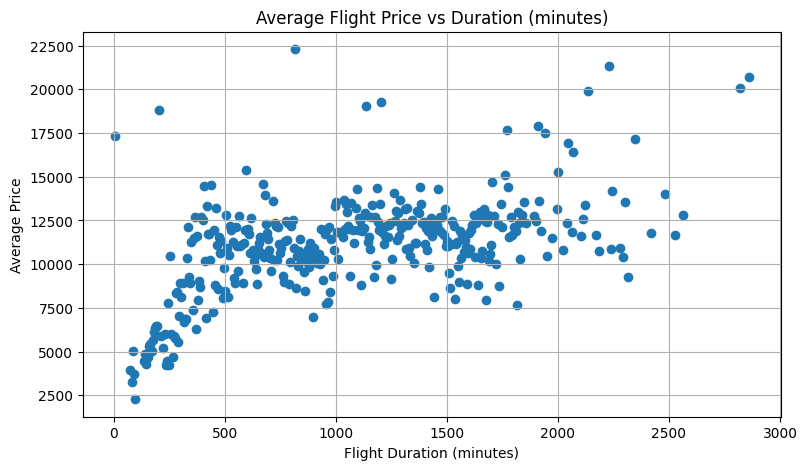

In [60]:
duration_price = ( df.groupby('Duration_min')['Price'] .mean() .sort_index() ) 
print(duration_price) 
plt.figure(figsize=(9,5)) 
plt.scatter(duration_price.index, duration_price.values, marker='o') 
plt.title('Average Flight Price vs Duration (minutes)') 
plt.xlabel('Flight Duration (minutes)') 
plt.ylabel('Average Price') 
plt.grid(True) 
plt.show()

**Insight:** Flight Prices generally increase with longer travel durations, indicating that longer and more complex journeys tend to be priced higher than shorter, direct flights.

### 7.6 Distribution of Arrival Hours
We analyze how **flights are distributed across different arrival hours** using a **bar plot**:

In [61]:
# Convert to datetime if needed 
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'], errors='coerce') 
# Extract hour 
df['Arrival_Hour'] = df['Arrival_Time'].dt.hour

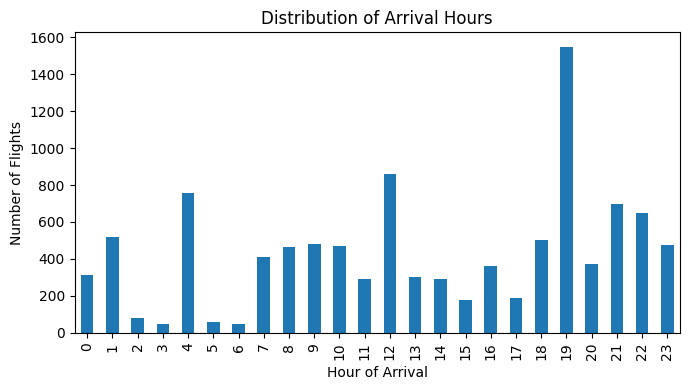

In [62]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(7,4)) 
df['Arrival_Hour'].value_counts().sort_index().plot(kind='bar') 
plt.title('Distribution of Arrival Hours') 
plt.xlabel('Hour of Arrival') 
plt.ylabel('Number of Flights') 
plt.tight_layout() 
plt.show()

**Insight:** Most flights arrive during late evening and early night hours, indicating airline scheduling preferences and higher traffic during these time windows.

### 7.7 Mean Flight Price by Airline: 
Weekday vs Weekend This analysis compares the **average ticket prices for each airline on weekdays and weekends** to understand whether airlines apply **different pricing strategies based on travel day type**.

                                   Weekday_Price  Weekend_Price
Airline                                                        
Air Asia                             5284.378505    6213.676190
Air India                            9245.127150    9731.482961
GoAir                                5723.205159    6046.556618
IndiGo                               5470.554624    6087.895062
Jet Airways                         11166.498559   11530.807585
Multiple carriers                   10393.377427   11636.348187
Multiple carriers Premium economy   11418.846154            NaN
SpiceJet                             4176.398625    4736.198276
Trujet                               4140.000000            NaN
Vistara                              7622.574848    8134.426667
Vistara Premium economy              9125.000000    8881.000000


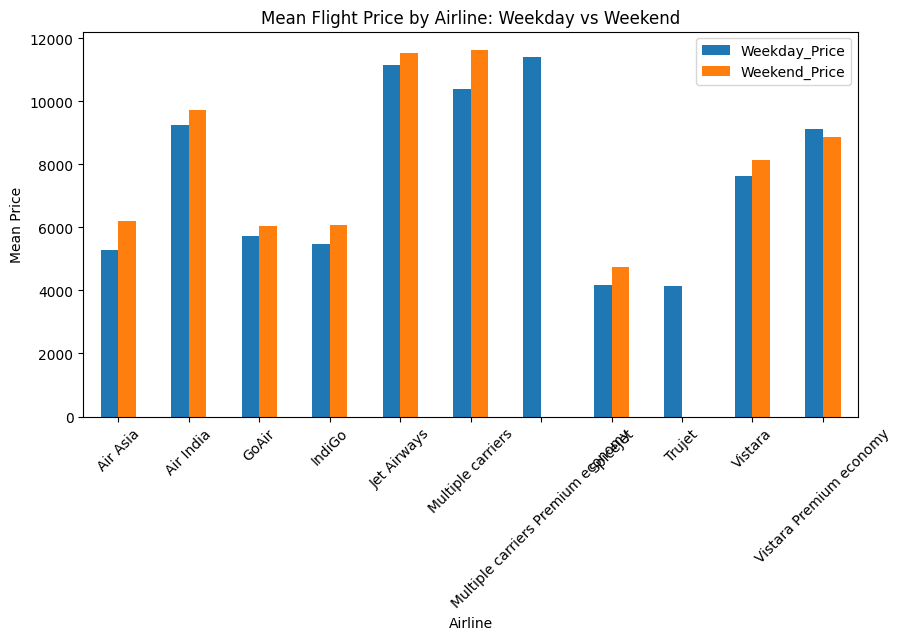

In [63]:
airline_weekend_price = ( df .groupby(['Airline', 'Is_Weekend'])['Price_capped'] .mean() .reset_index() ) 
pivot_df = airline_weekend_price.pivot( index='Airline', columns='Is_Weekend', values='Price_capped' ) 
pivot_df.columns = ['Weekday_Price', 'Weekend_Price'] 
print(pivot_df) 
pivot_df.plot(kind='bar', figsize=(10,5)) 
plt.xlabel('Airline') 
plt.ylabel('Mean Price') 
plt.title('Mean Flight Price by Airline: Weekday vs Weekend') 
plt.xticks(rotation=45) 
plt.show()

**Insight:** For most airlines, weekend fares are higher than weekday fares, indicating demand-driven weekend pricing, while a few premium or low-frequency airlines show missing or minimal weekend data due to limited weekend operations.

### 7.8 Distribution of Flights by Weekend and Weekdays by each Airlines 
This bar chart visualizes the **number of flights operating on weekdays versus weekends** using the Is_Weekend feature.

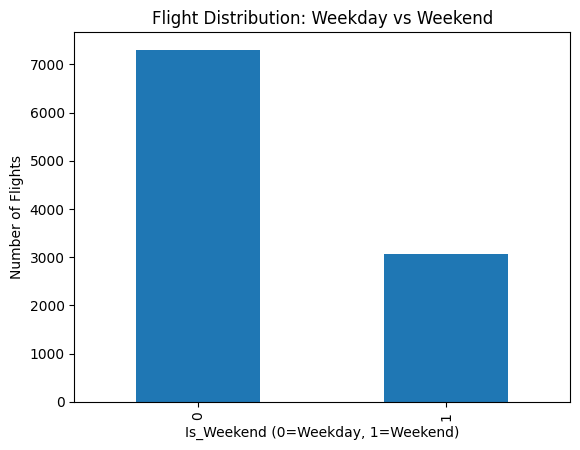

In [64]:
df['Is_Weekend'].value_counts().plot(kind='bar') 
plt.xlabel('Is_Weekend (0=Weekday, 1=Weekend)') 
plt.ylabel('Number of Flights') 
plt.title('Flight Distribution: Weekday vs Weekend') 
plt.show()

**Insight:** A higher number of flights operate on weekdays compared to weekends, indicating greater business and routine travel demand during weekdays.

### 7.8.1 Direct flights more common on weekends?

In [65]:
pd.crosstab(df['Total_Stops'], df['Is_Weekend'], normalize='index') * 100

Is_Weekend,0,1
Total_Stops,,
0,69.326037,30.673963
1,70.972973,29.027027
2,71.428571,28.571429
3,62.790698,37.209302
4,100.000000,0.000000


**Insight:** Most flights, regardless of the number of stops, operate on weekdays. Weekend flights form a smaller proportion, but for flights with 3 stops, weekend travel is relatively higher (≈37%), suggesting leisure travelers may prefer longer, multi-stop routes on weekends.

### 7.8.2 Flight Duration Comparison: Weekday vs Weekend Travel

In [66]:
df.groupby('Is_Weekend')['Duration_min'].mean()

Is_Weekend
0    627.893620
1    629.840078
Name: Duration_min, dtype: float64

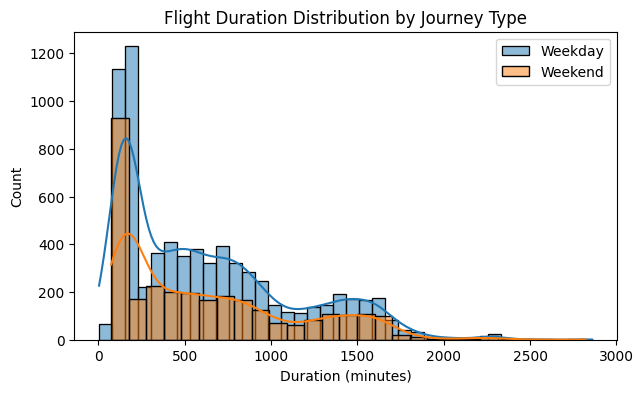

In [67]:
plt.figure(figsize=(7,4)) 
sns.histplot(df[df['Is_Weekend']==0]['Duration_min'], label='Weekday', kde=True) 
sns.histplot(df[df['Is_Weekend']==1]['Duration_min'], label='Weekend', kde=True) 
plt.xlabel('Duration (minutes)') 
plt.title('Flight Duration Distribution by Journey Type') 
plt.legend() 
plt.show()

**Insight:** The average flight duration is almost similar for weekdays (≈628 min) and weekends (≈630 min). The histogram shows overlapping distributions, indicating that weekend travelers do not significantly prefer shorter or longer flights on average.

### 7.9 Distribution of Flights by Journey Month

We analyze how **flights are distributed across different months** using a **bar plot**:

In [68]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], errors='coerce') 
df['Journey_Month'] = df['Date_of_Journey'].dt.month

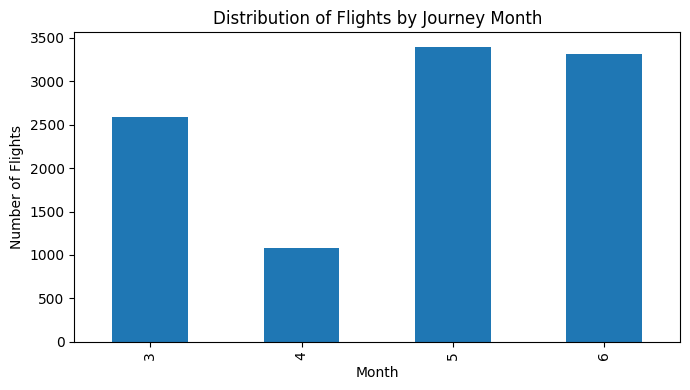

In [69]:
plt.figure(figsize=(7,4)) 
df['Journey_Month'].value_counts().sort_index().plot(kind='bar') 
plt.title('Distribution of Flights by Journey Month') 
plt.xlabel('Month') 
plt.ylabel('Number of Flights') 
plt.tight_layout() 
plt.show()

**Insight:** March has the highest number of flights, followed by May, while April and June have relatively fewer flights, indicating seasonal variations in travel demand.

### 7.10 Median Flight Price by Airline

We analyze the **median ticket price for each airline** using a **bar plot**:

Airline
SpiceJet                              3873.0
Trujet                                4140.0
IndiGo                                5000.0
GoAir                                 5135.0
Air Asia                              5162.0
Vistara                               7980.0
Vistara Premium economy               9125.0
Air India                             9190.0
Multiple carriers                    10197.0
Jet Airways                          11087.0
Multiple carriers Premium economy    11269.0
Name: Price, dtype: float64


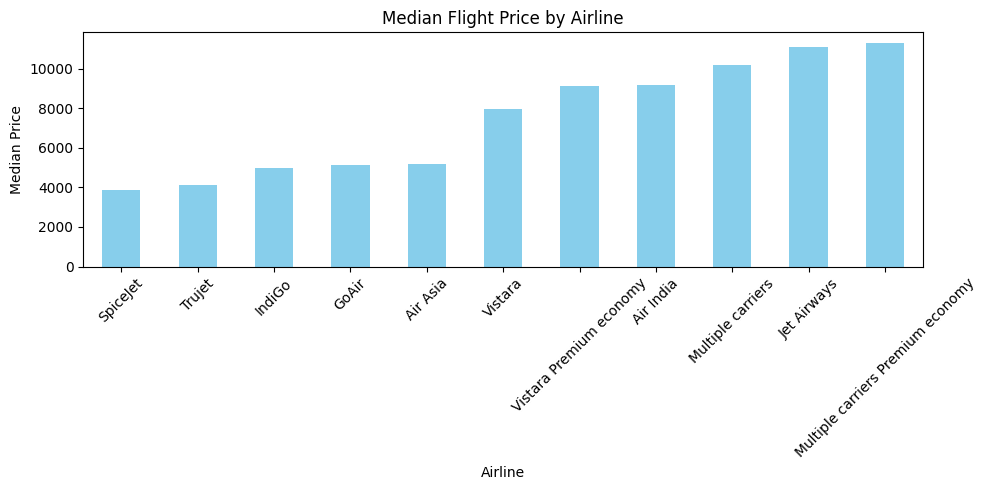

In [71]:
median_prices = df.groupby('Airline')['Price'].median().sort_values() 
print(median_prices) 
plt.figure(figsize=(10,5)) 
median_prices.plot(kind='bar', color='skyblue') 
plt.title('Median Flight Price by Airline') 
plt.xlabel('Airline') 
plt.ylabel('Median Price') 
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

**Insight:** Median flight prices vary by airline, with budget carriers being the cheapest and premium carriers the highest. The mean prices are higher than the medians due to a few very expensive tickets, indicating a right-skewed distribution.

In [72]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Num_of_Routes_Covered', 'Month',
       'Duration_min', 'Season', '1_Long_layover', 'Change_airports',
       'Business_class', 'Flight_Dept_Slot', 'Day_of_Dept', 'Is_Weekend',
       'Price_capped', 'Arrival_Hour', 'Journey_Month'],
      dtype='str')

### 7.11 Airline-wise Price Category Distribution

We segment ticket prices into **quartiles** (Low, Medium, High, Very High) and visualize **how different airlines distribute their flights across these price categories** using a **stacked bar plot**:

In [73]:
df['Price_Category'] = pd.qcut(df['Price'], q=4, labels=['Low','Medium','High','Very High']) 
# Group by Airline and Price_Category, count number of flights 
airline_price_seg = df.groupby(['Airline', 'Price_Category'])['Price'].count().unstack(fill_value=0) 
print(airline_price_seg)

Price_Category                      Low  Medium  High  Very High
Airline                                                         
Air Asia                            188      97    31          3
Air India                           232     412   634        401
GoAir                               101      68    20          5
IndiGo                             1082     781   119         61
Jet Airways                         227     591  1157       1663
Multiple carriers                     0     378   396        412
Multiple carriers Premium economy     0       0    10          3
SpiceJet                            656     118    37          3
Trujet                                1       0     0          0
Vistara                             111     144   184         39
Vistara Premium economy               0       1     2          0


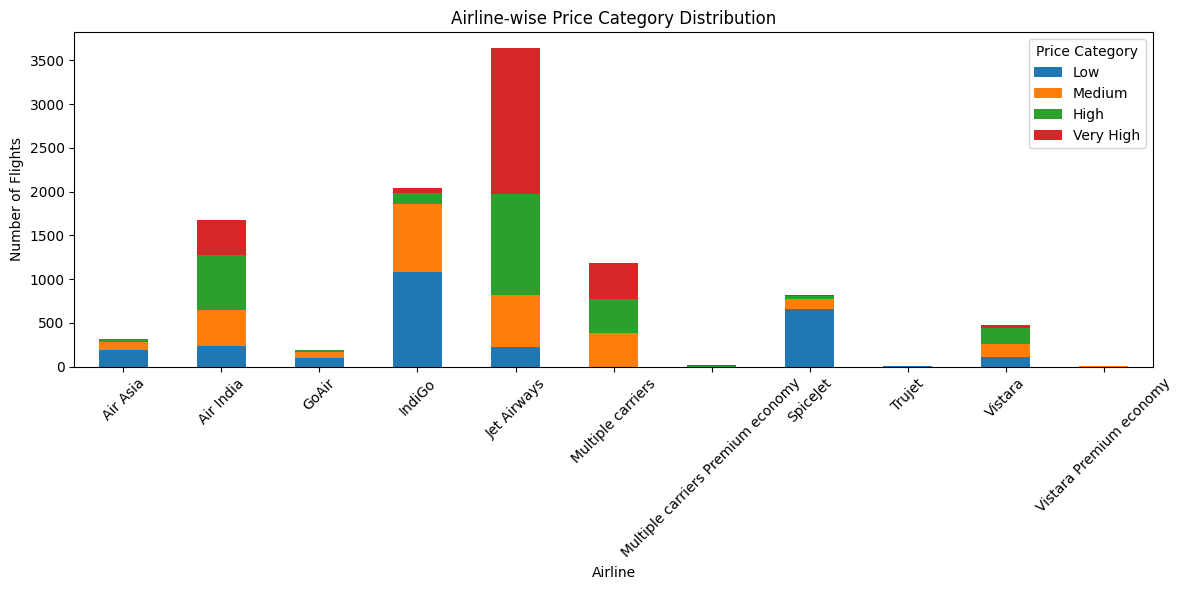

In [74]:
import matplotlib.pyplot as plt 
airline_price_seg.plot( kind='bar', stacked=True, figsize=(12,6) ) 
plt.title('Airline-wise Price Category Distribution') 
plt.xlabel('Airline') 
plt.ylabel('Number of Flights') 
plt.legend(title='Price Category') 
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

**Insight:** The distribution of flights across price categories varies by airline. Budget carriers like IndiGo and SpiceJet have the majority of flights in the Low and Medium categories, while premium carriers like Jet Airways and Air India have more flights in the High and Very High price ranges, reflecting their pricing strategy and target customer segments.

### 7.12 Number of Flights per Airline
We analyze how **flights are distributed among different airlines** using a **count plot**:

In [75]:
# Count of flights per airline 
flights_per_airline = df['Airline'].value_counts() 
print(flights_per_airline)

Airline
Jet Airways                          3638
IndiGo                               2043
Air India                            1679
Multiple carriers                    1186
SpiceJet                              814
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64


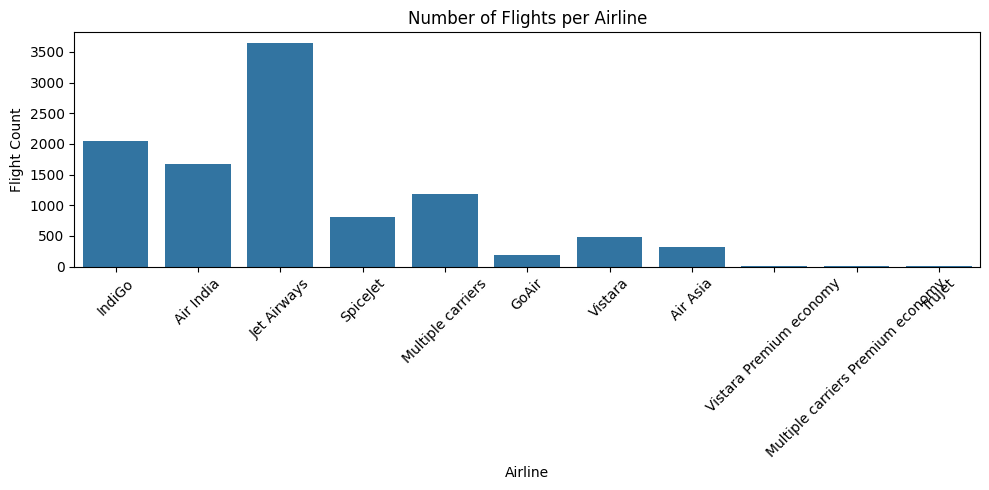

In [77]:
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,5)) 
sns.countplot(data=df, x='Airline') 
plt.title('Number of Flights per Airline') 
plt.xlabel('Airline') 
plt.ylabel('Flight Count') 
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

**Insight:** Jet Airways operates the highest number of flights, followed by IndiGo and Air India, indicating their larger network and market presence. Smaller carriers like Trujet and Vistara Premium Economy have very few flights, reflecting limited operations or niche segments.

### 7.13 Top Route per Airline 
We analyze the **most frequently flown route for each airline** and visualize it using a **horizontal bar plot**:

In [78]:
# Combine Source and Destination as a single route
df['Route_Pair'] = df['Source'] + " → " + df['Destination']
# Count occurrences of each route per airline
route_counts = df.groupby(['Airline', 'Route_Pair']).size().reset_index(name='Count')
# Sort by count descending and get top route for each airline
top_routes = route_counts.sort_values(['Airline', 'Count'], ascending=[True, False])
top_routes_per_airline = top_routes.groupby('Airline').first().reset_index()
print(top_routes_per_airline[['Airline', 'Route_Pair', 'Count']])

                              Airline          Route_Pair  Count
0                            Air Asia  Kolkata → Banglore    150
1                           Air India      Delhi → Cochin    699
2                               GoAir      Delhi → Cochin     76
3                              IndiGo      Delhi → Cochin    705
4                         Jet Airways      Delhi → Cochin   1438
5                   Multiple carriers      Delhi → Cochin   1186
6   Multiple carriers Premium economy      Delhi → Cochin     13
7                            SpiceJet  Kolkata → Banglore    300
8                              Trujet  Mumbai → Hyderabad      1
9                             Vistara  Kolkata → Banglore    183
10            Vistara Premium economy    Banglore → Delhi      1


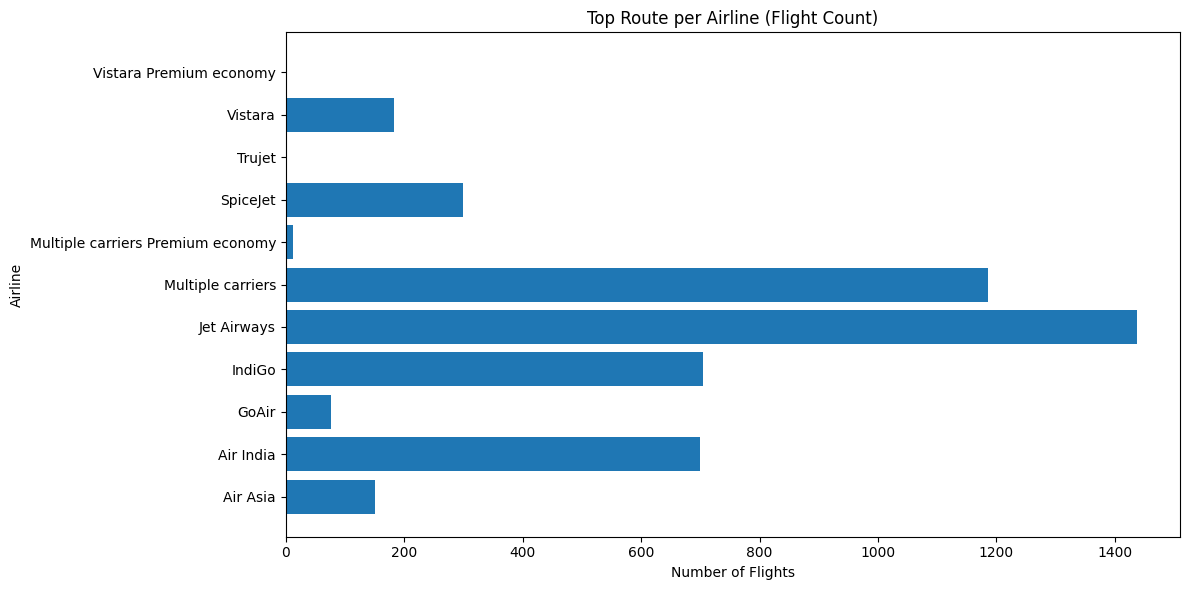

In [79]:
plt.figure(figsize=(12,6)) 
plt.barh( top_routes_per_airline['Airline'], top_routes_per_airline['Count'] ) 
plt.title('Top Route per Airline (Flight Count)') 
plt.xlabel('Number of Flights') 
plt.ylabel('Airline') 
plt.tight_layout() 
plt.show()

**Insight:** Most airlines, including Air India, IndiGo, and Jet Airways, have Delhi → Cochin as their top route, indicating it is a high-demand corridor. Air Asia and SpiceJet operate primarily on Kolkata → Banglore, reflecting their regional focus. Smaller carriers like Trujet and Vistara Premium Economy have limited flights, showing niche or specialized operations.

### 7.14 Flights by Departure Slot 
We analyze the **number of flights departing in different time slots** (Morning, Afternoon, Evening, Night) using a **bar plot**:

In [80]:
# Count number of flights per departure slot
slot_counts = df['Flight_Dept_Slot'].value_counts() 
print(slot_counts)

Flight_Dept_Slot
Mrng    4760
Evng    2309
Aft     1858
Nyt     1441
Name: count, dtype: int64


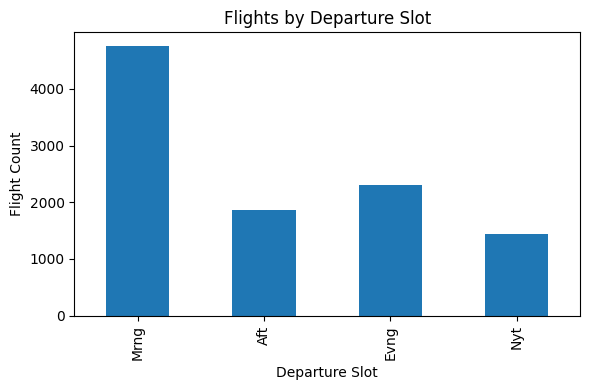

In [81]:
order = ['Mrng', 'Aft', 'Evng', 'Nyt'] 
slot_counts = slot_counts.reindex(order) 
plt.figure(figsize=(6,4)) 
slot_counts.plot(kind='bar') 
plt.title('Flights by Departure Slot') 
plt.xlabel('Departure Slot') 
plt.ylabel('Flight Count') 
plt.tight_layout() 
plt.show()

**Insight:** Most flights depart in the Morning (Mrng), followed by Evening (Evng) and Afternoon (Aft), while Night (Nyt) departures are the least. This reflects airlines’ preference to operate major flights during daytime hours for higher passenger demand.

### 7.15 Departure Slot vs Average Price & Number of Flights

We analyze how **average ticket prices vary across departure slots** and compare it with the **number of flights** using a **combined bar and line chart**:

In [83]:
# Average price per Flight_Dept_Slot
slot_price_avg = df.groupby('Flight_Dept_Slot')['Price'].mean().sort_values(ascending=False)
print(slot_price_avg)

Flight_Dept_Slot
Aft     9156.503229
Evng    9005.139887
Mrng    8940.965336
Nyt     7782.004164
Name: Price, dtype: float64


In [84]:
slot_counts = df['Flight_Dept_Slot'].value_counts()

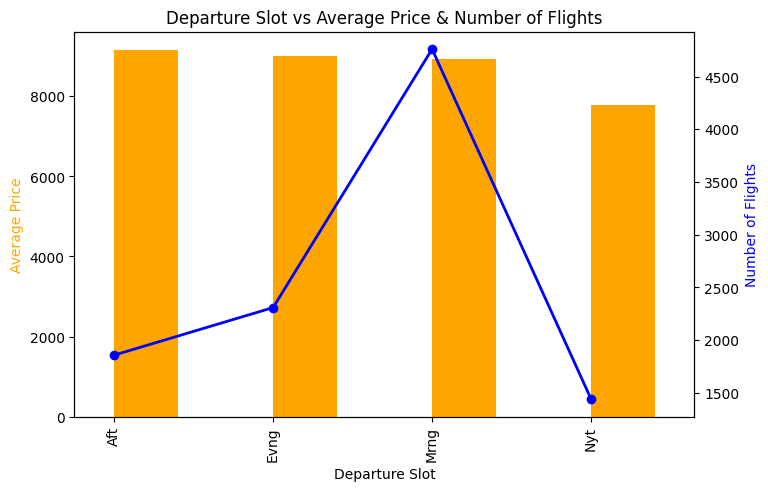

In [87]:
import matplotlib.pyplot as plt 
fig, ax1 = plt.subplots(figsize=(8,5)) 
# Bar chart for average price 
slot_price_avg.plot(kind='bar', color='orange', ax=ax1, position=0, width=0.4) 
ax1.set_ylabel('Average Price', color='orange') 
ax1.set_xlabel('Departure Slot') 
ax1.set_title('Departure Slot vs Average Price & Number of Flights') 
# Line chart for number of flights 
ax2 = ax1.twinx() 
slot_counts = slot_counts.reindex(slot_price_avg.index) # align order 
ax2.plot(slot_counts.index, slot_counts.values, color='blue', marker='o', linewidth=2) 
ax2.set_ylabel('Number of Flights', color='blue') 
plt.xticks(rotation=0) 
plt.show()

**Insight:**  
- Afternoon (Aft) flights have the highest average ticket prices, followed by Evening (Evng) and Morning (Mrng), while Night (Nyt) flights are the cheapest.  
- Morning flights are the most frequent, whereas Night flights are least common, indicating airlines schedule more daytime flights despite slightly lower prices. 

### 7.16 Flights per Month per Airline

We analyze **how flight counts vary across months for each airline** using a **grouped bar plot**:

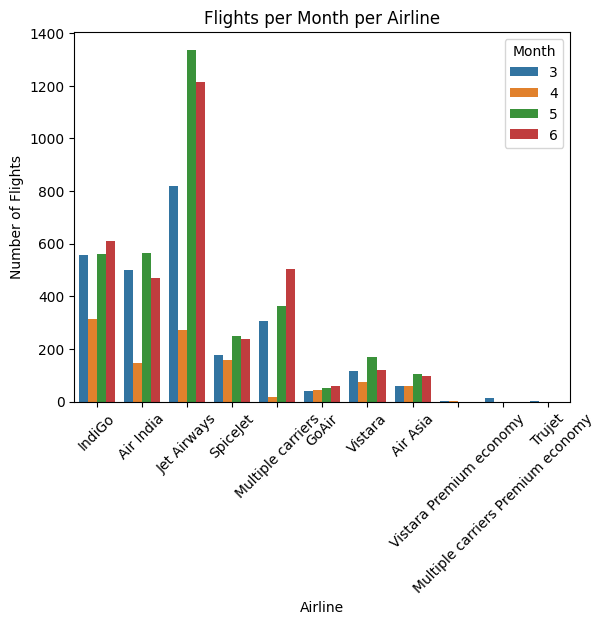

In [88]:
import matplotlib.pyplot as plt 
import seaborn as sns 
# Count flights per month per airline (all months included) 
month_airline_counts = df.groupby(['Airline','Month']).size().reset_index(name='Count') 
# Make sure all months are included per airline 
all_months = [3,4,5,6] 
all_airlines = df['Airline'].unique() 
# Create a complete dataframe with all airline-month combinations 
full_index = pd.MultiIndex.from_product([all_airlines, all_months], names=['Airline','Month']) 
month_airline_full = month_airline_counts.set_index(['Airline','Month']).reindex(full_index, fill_value=0).reset_index() 
# Plot using seaborn plt.figure(figsize=(14,6)) 
sns.barplot(data=month_airline_full, x='Airline', y='Count', hue='Month', dodge=True, palette='tab10') 
plt.title('Flights per Month per Airline') 
plt.ylabel('Number of Flights') 
plt.xlabel('Airline') 
plt.xticks(rotation=45) 
plt.legend(title='Month') 
plt.show()

**Insight:** Some airlines like IndiGo and Jet Airways maintain a consistent number of flights across months, while others show seasonal variations. This helps understand monthly flight trends and airline scheduling patterns.

### 7.17 Average Flight Price vs Total Stops 
We analyze how **average ticket prices vary with the number of stops** using a **bar plot**:

Total_Stops
0     4998.775922
1    10322.241081
2    12554.862519
3    13260.674419
4    17686.000000
Name: Price, dtype: float64


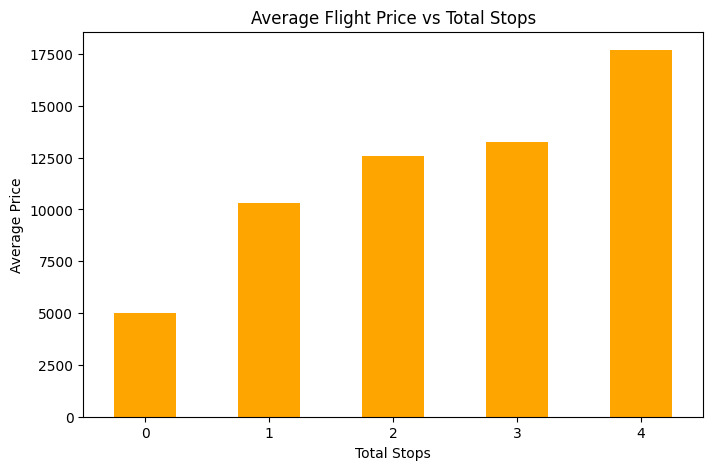

In [90]:
# Calculate average price per Total_Stops 
stops_price_avg = df.groupby('Total_Stops')['Price'].mean().sort_index() 
print(stops_price_avg) 
import matplotlib.pyplot as plt 
plt.figure(figsize=(8,5)) 
stops_price_avg.plot(kind='bar', color='orange') 
plt.title('Average Flight Price vs Total Stops') 
plt.xlabel('Total Stops') 
plt.ylabel('Average Price') 
plt.xticks(rotation=0) 
plt.show()

**Insight:** 
- Flights with more stops tend to have higher average prices, indicating that longer or multi-stop flights are generally costlier. 
- Non-stop flights have the lowest average fare, while flights with 4 stops are the most expensive.

### 7.18 Distribution of Ticket Prices (Capped) 
We visualize the **distribution of flight ticket prices** using a **histogram with KDE**:

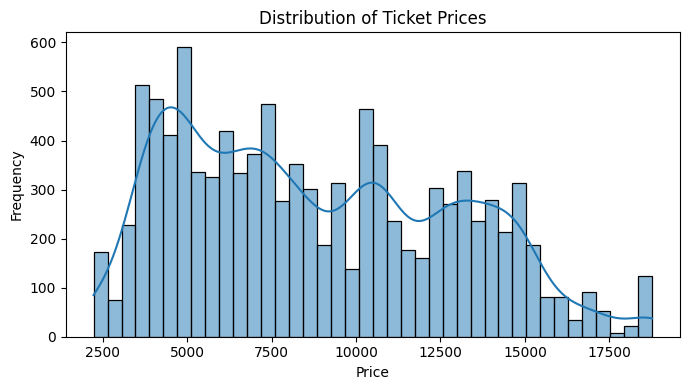

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
sns.histplot(df['Price_capped'], bins=40, kde=True)

plt.title('Distribution of Ticket Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Insight:** 
- Most ticket prices are concentrated in the lower range. 
- The distribution is slightly right-skewed, meaning there are a few high-priced flights compared to the majority of lower-priced ones.

### 7.19 Distribution of Total Stops 
We analyze the **number of stops for all flights** using a **bar plot**:

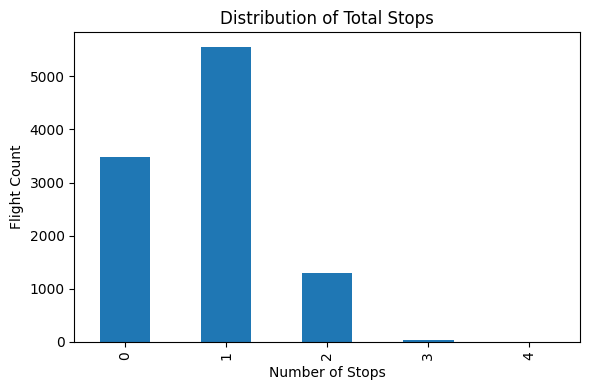

In [94]:
plt.figure(figsize=(6,4)) 
df['Total_Stops'].value_counts().sort_index().plot(kind='bar') 
plt.title('Distribution of Total Stops') 
plt.xlabel('Number of Stops') 
plt.ylabel('Flight Count') 
plt.tight_layout() 
plt.show()

**Insight:** 
- Majority of flights are direct (0 stops) or have 1 stop. 
- Fewer flights have 3 or more stops, indicating most travelers prefer shorter or non-stop routes.

### 7.20 Top 10 Most Frequent Routes 
We visualize the **most common flight routes** in the dataset using a **bar plot**:

Route
DEL → BOM → COK    2368
BLR → DEL          1534
CCU → BOM → BLR     979
CCU → BLR           723
BOM → HYD           621
CCU → DEL → BLR     565
MAA → CCU           381
BLR → BOM → DEL     341
DEL → HYD → COK     326
DEL → BLR → COK     231
Name: count, dtype: int64


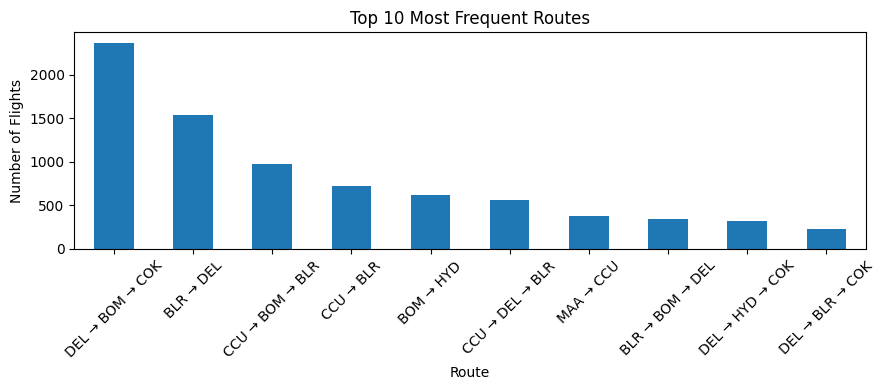

In [97]:
top_routes = df['Route'].value_counts().head(10) 
print(top_routes) 
plt.figure(figsize=(9,4)) 
top_routes.plot(kind='bar') 
plt.title('Top 10 Most Frequent Routes') 
plt.xlabel('Route') 
plt.ylabel('Number of Flights') 
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

**Insight:** 
- Routes like **DEL → BOM → COK** and **BLR → DEL** are the most frequently operated, indicating high passenger demand on these corridors. 
- Multi-leg routes appear often among top routes, reflecting connectivity preferences for travelers.

### 7.21 Flights by Source City 
We visualize the **number of flights departing from each source city** using a **bar plot**:

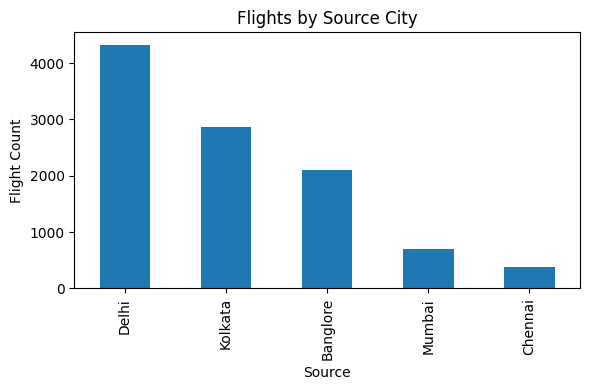

In [98]:
plt.figure(figsize=(6,4)) 
df['Source'].value_counts().plot(kind='bar') 
plt.title('Flights by Source City') 
plt.xlabel('Source') 
plt.ylabel('Flight Count') 
plt.tight_layout() 
plt.show()

**Insight:** 
- Cities like **Delhi** and **Kolkata** have the highest number of departures, indicating they are major hubs for flight operations. 
- Smaller source cities have significantly fewer flights, showing concentration of air traffic in major metros.

### 7.22 Flights by Destination City 
We visualize the **number of flights arriving at each destination city** using a **bar plot**:

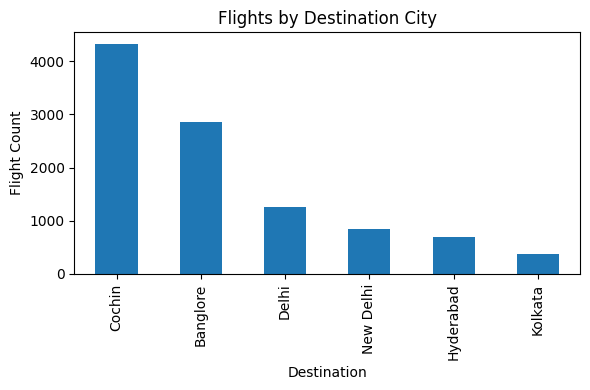

In [99]:
plt.figure(figsize=(6,4)) 
df['Destination'].value_counts().plot(kind='bar') 
plt.title('Flights by Destination City') 
plt.xlabel('Destination')
plt.ylabel('Flight Count') 
plt.tight_layout() 
plt.show()

**Insight:** 
- **Cochin** and **Bangalore** are the most frequent destinations, indicating they are major travel hubs. 
- Other destinations have comparatively fewer flights, reflecting concentrated passenger demand to top cities.

### 8.Finding relationships 
### 8.1 Correlation: 
- Measures the **strength and direction of linear relationships** between two numerical features.
- Values range from **-1 to 1**:
  - **1** → perfect positive correlation
  - **-1** → perfect negative correlation
  - **0** → no linear correlation
- Helps identify which features are **most strongly related to the target variable** (e.g., Price_capped) and which may be redundant.

### 8.2 Heatmap: 
- A **visual representation of the correlation matrix**.
- Makes it **easier to spot patterns and relationships** between multiple features at a glance.
- Color intensity shows the **magnitude and direction of correlation**, helping in **feature selection and analysis**.

### 8.3 Encoding: 
- Many features are **categorical** (like Airline, Source, Destination, Season).
- Correlation calculations require **numerical values**, so we **convert categories to numbers** using LabelEncoder.
- This allows us to **include categorical features in correlation analysis** and understand their influence on the target variable.

### 8.4 Correlation Heatmap for Airline Fare Prediction 
We visualize the **relationships between numerical and encoded categorical features** using a **correlation heatmap**:

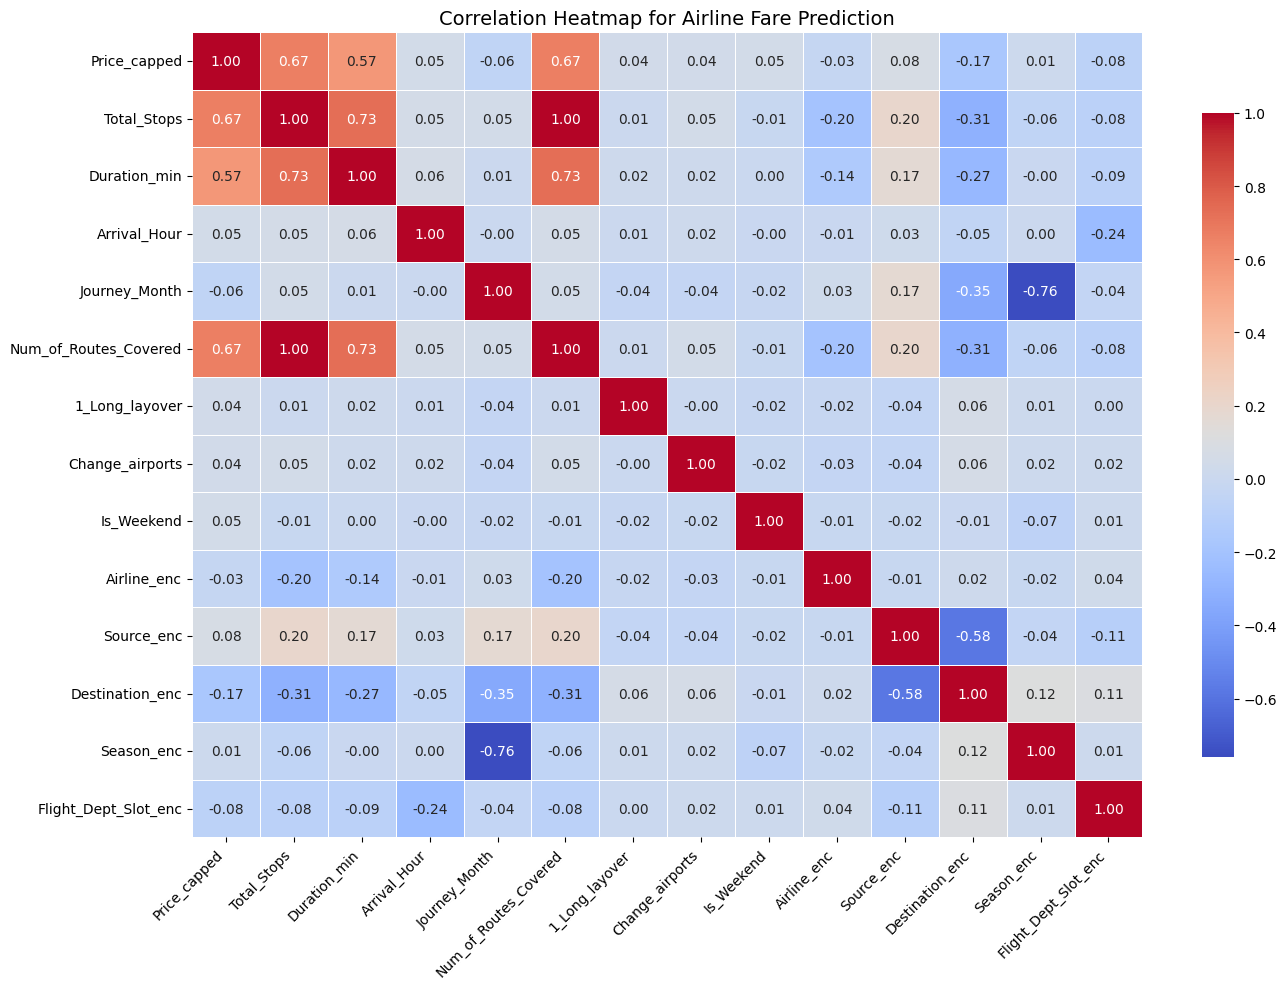

In [104]:
corr_cols = [ 'Price_capped', 'Total_Stops', 'Duration_min', 'Arrival_Hour', 'Journey_Month', 'Num_of_Routes_Covered', '1_Long_layover', 'Change_airports', 'Is_Weekend' ] 
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
df['Airline_enc'] = le.fit_transform(df['Airline']) 
df['Source_enc'] = le.fit_transform(df['Source']) 
df['Destination_enc'] = le.fit_transform(df['Destination']) 
df['Season_enc'] = le.fit_transform(df['Season']) 
df['Flight_Dept_Slot_enc'] = le.fit_transform(df['Flight_Dept_Slot']) 
corr_cols_extended = corr_cols + [ 'Airline_enc', 'Source_enc', 'Destination_enc', 'Season_enc', 'Flight_Dept_Slot_enc' ] 
corr_matrix = df[corr_cols_extended].corr() 
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.figure(figsize=(14,10)) 
sns.heatmap( corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, cbar_kws={"shrink": 0.8} ) 
plt.title("Correlation Heatmap for Airline Fare Prediction", fontsize=14) 
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0) 
plt.tight_layout() 
plt.show()

### 9.Statistical Validation 
Statistical validation helps us move beyond visual trends and descriptive summaries to quantitatively confirm patterns in the data. It ensures that observed differences or associations are statistically significant and not due to random chance. 
### 9.1 t-test: Morning vs Night Flights 
The t-test compares the mean ticket prices of Morning and Night flights. 
- **Null Hypothesis (H₀):** There is no difference in average prices.
- **Alternative Hypothesis (H₁):** There is a significant price difference. 
Since the p-value is: 
- **< 0.05:** We reject H₀ - Departure timing impacts ticket prices 
- **≥ 0.05:** We fail to reject H₀ - No strong evidence of price difference

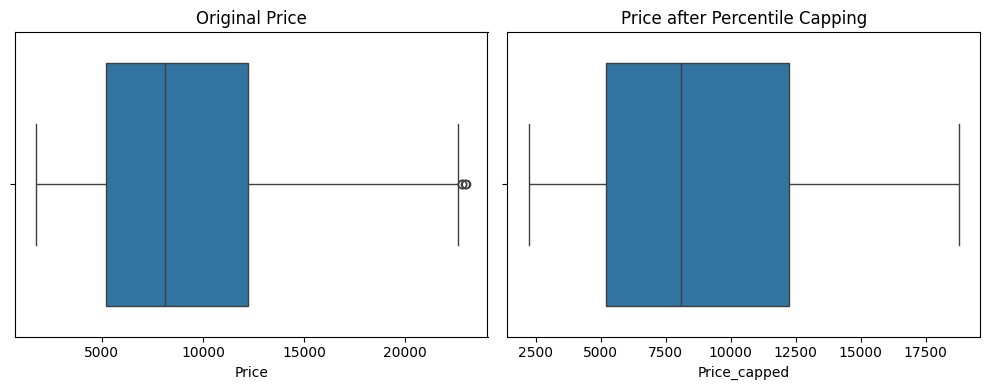

In [105]:
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,4)) 
plt.subplot(1,2,1) 
sns.boxplot(x=df['Price']) 
plt.title('Original Price') 
plt.subplot(1,2,2) 
sns.boxplot(x=df['Price_capped']) 
plt.title('Price after Percentile Capping') 
plt.tight_layout() 
plt.show()

In [106]:
from scipy.stats import ttest_ind

# Select two groups
morning_price = df[df['Flight_Dept_Slot'] == 'Mrng']['Price_capped']
night_price = df[df['Flight_Dept_Slot'] == 'Nyt']['Price_capped']

# Perform t-test (Welch’s t-test)
t_stat, p_value = ttest_ind(morning_price, night_price, equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Significant price difference between Morning and Night flights")
else:
    print("No significant price difference between Morning and Night flights")

t-statistic: 9.032396393273201
p-value: 3.561029735779524e-19
Significant price difference between Morning and Night flights


**Interpretation:**  
- Since **p-value < 0.05**, we reject H₀.  
- There is a **significant price difference** between Morning and Night flights, indicating that departure timing impacts ticket prices.

In [107]:
print("Morning Mean Price:", morning_price.mean())
print("Night Mean Price:", night_price.mean())
print("Mean Difference:", morning_price.mean() - night_price.mean())

Morning Mean Price: 8923.42044117647
Night Mean Price: 7779.740527411521
Mean Difference: 1143.6799137649487


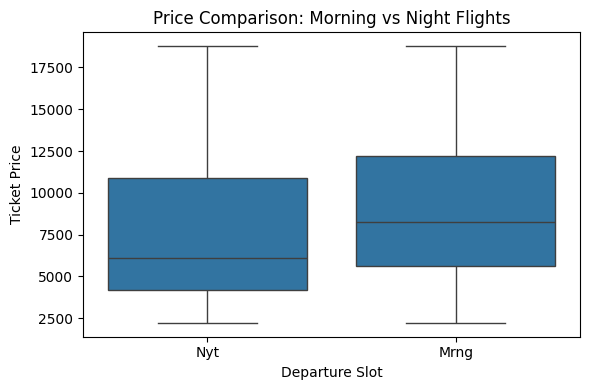

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(
    x='Flight_Dept_Slot',
    y='Price_capped',
    data=df[df['Flight_Dept_Slot'].isin(['Mrng','Nyt'])]
)
plt.title('Price Comparison: Morning vs Night Flights')
plt.xlabel('Departure Slot')
plt.ylabel('Ticket Price')
plt.tight_layout()
plt.show()

### **9.2 F-test (ANOVA): Competitor Airline Pricing on the Same Routes**

Airlines operate as competitors when they serve the same **source–destination route**.  
This test evaluates whether **average ticket prices differ significantly** across competing airlines operating on the **same route**.

**Why ANOVA is used here**
- **Target variable:** `Price_capped` (continuous)  
- **Grouping variable:** `Airline` (more than two competitors)  
- **Controlled factor:** `Route_Pair` (same route → fair comparison)  

Since we are comparing **more than two airlines**, a t-test is not suitable , **F-test (ANOVA)** is required.

**Null & Alternative Hypotheses**
- **Null Hypothesis (H₀):**  
  For a given route, all airlines charge the same average ticket price.
- **Alternative Hypothesis (H₁):**  
  At least one airline charges a significantly different average price on the same route.

In [109]:
from scipy.stats import f_oneway

# Filter data for a specific route
route_df = df[df['Route_Pair'] == 'Banglore → Delhi']

# Create a list of price arrays for each airline on this route
airline_prices = [
    route_df[route_df['Airline'] == airline]['Price_capped']
    for airline in route_df['Airline'].unique()
]

# Perform one-way ANOVA (F-test)
f_stat, p_value = f_oneway(*airline_prices)

print("F-statistic:", f_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Significant price difference among competing airlines on this route")
else:
    print("No significant price difference among airlines on this route")

F-statistic: 201.12915822793093
P-value: 4.756851150362387e-200
Significant price difference among competing airlines on this route


**Interpretation**

- Since the p-value is **< 0.05**, we reject **H₀**.  
- There is a **significant difference in ticket prices among competing airlines on the same route**, indicating that **competitor pricing strongly impacts fare prices**.

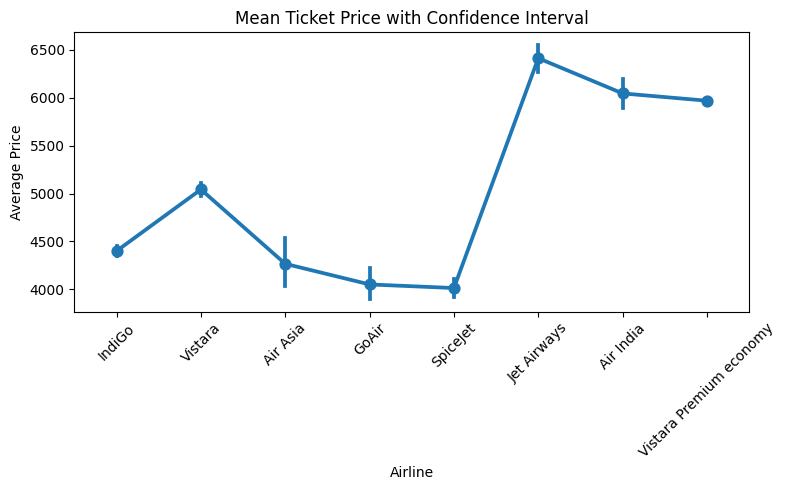

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

route_df = df[df['Route_Pair'] == 'Banglore → Delhi']

plt.figure(figsize=(8, 5))
sns.pointplot(
    x='Airline',
    y='Price_capped',
    data=route_df,
    errorbar='ci'
)

plt.title('Mean Ticket Price with Confidence Interval')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 9.3 Chi-Square Test: Departure Slot vs Price Category

The chi-square test was performed to examine whether ticket price categories
are independent of flight departure slots.

- **Null Hypothesis (H₀):** Departure slot and price category are independent.
- **Alternative Hypothesis (H₁):** Departure slot and price category are associated.

A p-value less than 0.05 indicates a statistically significant relationship,
suggesting that departure timing plays a role in fare pricing.

In [111]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(
    df['Flight_Dept_Slot'],
    df['Price_Category']
)

print(contingency_table)

Price_Category     Low  Medium  High  Very High
Flight_Dept_Slot                               
Aft                375     513   439        531
Evng               549     530   630        600
Mrng              1085    1275  1234       1166
Nyt                589     272   287        293


In [112]:
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("P-value:", p_value)

if p_value < 0.05:
    print("Significant association between Departure Slot and Price Category")
else:
    print("No significant association between Departure Slot and Price Category")

Chi-square statistic: 255.6061577997359
Degrees of freedom: 9
P-value: 6.531923228832888e-50
Significant association between Departure Slot and Price Category


**Interpretation:**  
- Since **p-value < 0.05**, we reject H₀.  
- There is a **significant association** between Departure Slot and Price Category, indicating that ticket prices vary depending on the departure timing.

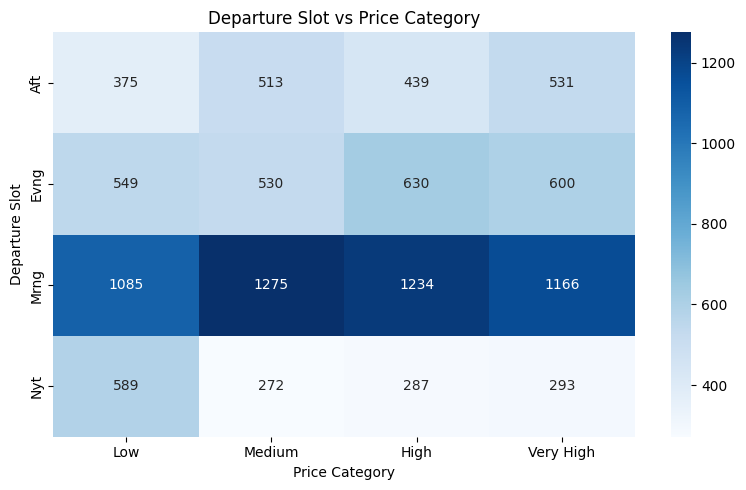

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Departure Slot vs Price Category')
plt.xlabel('Price Category')
plt.ylabel('Departure Slot')
plt.tight_layout()
plt.show()

In [114]:
df.to_csv("Airline_Fare_Forecasting.csv")

In [115]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Price_capped,Arrival_Hour,Journey_Month,Price_Category,Route_Pair,Airline_enc,Source_enc,Destination_enc,Season_enc,Flight_Dept_Slot_enc
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,1900-01-01 22:20:00,2026-02-07 01:10:00,2h 50m,0,No info,...,3897.0,1,3,Low,Banglore → New Delhi,3,0,5,1,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,1900-01-01 05:50:00,2026-02-07 13:15:00,7h 25m,2,No info,...,7662.0,13,5,Medium,Kolkata → Banglore,1,3,0,1,2
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1900-01-01 09:25:00,2026-02-07 04:25:00,19h,2,No info,...,13882.0,4,6,Very High,Delhi → Cochin,4,2,1,0,2
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,1900-01-01 18:05:00,2026-02-07 23:30:00,5h 25m,1,No info,...,6218.0,23,5,Medium,Kolkata → Banglore,3,3,0,1,1
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,1900-01-01 16:50:00,2026-02-07 21:35:00,4h 45m,1,No info,...,13302.0,21,3,Very High,Banglore → New Delhi,3,0,5,1,0


## 10.Key Insights from Exploratory Data Analysis (EDA)

This section summarizes the major findings obtained from univariate, bivariate, and statistical analysis performed on the airline fare dataset.

---

### 10.1 Ticket Price Distribution
- Ticket prices exhibit a **right-skewed distribution**, indicating the presence of a few high-priced flights.
- The **mean price is higher than the median**, confirming positive skewness.
- **Boxplots revealed extreme outliers**, which were handled using **percentile capping (1st–99th percentile)** to reduce their influence while retaining data integrity.

 *Why this matters:*  
Right-skewed prices are common in airline data due to premium classes and last-minute bookings.

---

### 10.2 Airline-wise Pricing Behavior
- Median ticket prices vary significantly across airlines.
- **Median** was preferred over mean because it is **robust to outliers** and better represents typical pricing.
- Boxplots showed clear **price dispersion differences among airlines**, reflecting different business models (low-cost vs premium carriers).

 *Insight:* Airline is a strong driver of fare variability.

---

### 10.3 Temporal Patterns (Time & Seasonality)
- **Departure Slot Analysis** shows that:
  - Night and evening flights tend to have **higher average fares**.
  - Morning flights generally offer **lower-priced tickets**.
- Monthly and seasonal analysis indicates:
  - Prices are higher during **peak travel seasons**.
  - Seasonal trends align with demand fluctuations in the Indian travel market.

---

### 10.4 Route & Journey Characteristics
- Ticket prices increase with:
  - **Number of stops**
  - **Flight duration**
  - **Number of routes covered**
- Direct flights (0 stops) are generally cheaper compared to flights with layovers.
- Certain high-traffic routes dominate the dataset, influencing pricing patterns.

 *Insight:* Journey complexity significantly impacts ticket pricing.

---

### 10.5 Correlation Analysis
- Correlation heatmap shows:
  - **Positive correlation** between price and:
    - Total stops
    - Duration (in minutes)
    - Number of routes covered
  - Weak or negligible correlation with purely categorical time features.
- Label encoding was applied to categorical variables to enable correlation computation.

 *Why encoding was required:*  
Correlation calculations require numerical inputs, hence categorical features were encoded only for analytical purposes.

---

### 10.6 Statistical Validation of Insights

#### **T-Test: Morning vs Night Flights**
- **t-statistic:** 9.03  
- **p-value:** 3.56 × 10⁻¹⁹  
- Result: **Statistically significant difference** in ticket prices.

*Interpretation:*  
Since p-value < 0.05, we reject H₀.  
Departure timing significantly impacts ticket prices, with morning and night flights showing different average fares.

---

#### **F-Test (ANOVA): Competitor Airline Pricing on Same Routes**
- F-test evaluates whether **average ticket prices differ significantly across competing airlines on the same route**.
- Controlled factor: **Route_Pair** (same route → fair comparison).  
- Null Hypothesis (H₀): All airlines on the same route charge the same average price.  
- Alternative Hypothesis (H₁): At least one airline charges a significantly different average price.  
- **F-statistic:** 201.13  
- **p-value:** 4.76 × 10⁻²⁰⁰  
- Result: **Significant price difference among competing airlines** on the same route.

*Interpretation:*  
Since p-value < 0.05, we reject H₀.  
Competitor fares strongly influence ticket pricing on the same route.

---

#### **Chi-Square Test: Departure Slot vs Price Category**
- **Chi-square statistic:** 255.61  
- **Degrees of freedom:** 9  
- **p-value:** 6.53 × 10⁻⁵⁰  
- Result: **Strong association** between departure slot and price category.

*Interpretation:*  
Since p-value < 0.05, we reject H₀.  
Ticket pricing categories are **not independent** of flight departure timing.


### 10.7 Overall EDA Conclusions
- Airline ticket prices are influenced by a **combination of temporal, route-based, and operational factors**.
- Statistical tests confirmed that observed patterns are **not random**, strengthening confidence in the findings.
- Key predictive features identified:
  - Airline
  - Departure slot
  - Total stops
  - Duration
  - Route complexity
  - Seasonality

---

### EDA Completion Statement
The exploratory data analysis successfully uncovered key patterns, validated assumptions using statistical tests, and identified meaningful predictors.  
The dataset is now **well-understood, cleaned, and ready for feature engineering and predictive modeling**.